In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import pickle

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('house.csv')
data

,TITLE,LOCATION,PRICE,LAND AREA,BUILDUP AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES
0,House for Sale,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,NaN,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
1,House for Sale,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,NaN,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ..."
2,4 BHK House for Sale,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,NaN,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
3,Bungalow House for Sale,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,NaN,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
4,House for Rent,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,NaN,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,Padma Colony Phase III,"Sitapiala, Kathmandu","Rs. 26,000,000",4.5 aana,NaN,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']"
3414,Bhatbhateni Apartment,"Bhatbhateni, Kathmandu","Rs. 30,000,000",4.5 aana,1700 Sq.ft,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']"
3415,स्यूचाटार,"Syuchatar, Kathmandu",Rs. 16000000,4.7 aana,1700 Sq.ft,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage']
3416,Sano Bharayang Colony,"Sano Bharayang, Kathmandu",Rs. 3.5 Cr,6.3 aana,3505 Sq.ft,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'..."


In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         3418 non-null   object 
 1   LOCATION      3418 non-null   object 
 2   PRICE         3418 non-null   object 
 3   LAND AREA     3329 non-null   object 
 4   BUILDUP AREA  719 non-null    object 
 5   ROAD ACCESS   3409 non-null   object 
 6   FACING        3212 non-null   object 
 7   FLOOR         3323 non-null   float64
 8   BEDROOM       3136 non-null   float64
 9   BATHROOM      3072 non-null   float64
 10  BUILT YEAR    3357 non-null   object 
 11  PARKING       632 non-null    object 
 12  AMENITIES     3418 non-null   object 
dtypes: float64(3), object(10)
memory usage: 347.3+ KB


Data Cleaning


In [4]:
data.isnull().sum()

TITLE              0
LOCATION           0
PRICE              0
LAND AREA         89
BUILDUP AREA    2699
ROAD ACCESS        9
FACING           206
FLOOR             95
BEDROOM          282
BATHROOM         346
BUILT YEAR        61
PARKING         2786
AMENITIES          0
dtype: int64

In [5]:
data.drop(columns=['TITLE', 'BUILDUP AREA','FACING', 'AMENITIES','PARKING'], inplace=True)

In [6]:
data

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FLOOR,BEDROOM,BATHROOM,BUILT YEAR
0,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,12 Feet,3.0,5.0,4.0,2076 B.S
1,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,10 Feet,4.5,5.0,6.0,2076 B.S
2,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,10 Feet,2.5,4.0,4.0,2060 B.S
3,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,12 Feet,2.5,4.0,3.0,2059 B.S
4,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,20 Feet,2.0,4.0,4.0,2071 B.S
...,...,...,...,...,...,...,...,...
3413,"Sitapiala, Kathmandu","Rs. 26,000,000",4.5 aana,16 Feet,2.5,4.0,4.0,2076 B.S
3414,"Bhatbhateni, Kathmandu","Rs. 30,000,000",4.5 aana,16 Feet,3.0,3.0,3.0,2076 B.S
3415,"Syuchatar, Kathmandu",Rs. 16000000,4.7 aana,16 Feet,2.5,4.0,2.0,2072 B.S
3416,"Sano Bharayang, Kathmandu",Rs. 3.5 Cr,6.3 aana,16 Feet,2.5,5.0,3.0,2077 B.S


RoadAcessColumn manipulate


In [7]:
def clean_road_access(value):
    if pd.isna(value):
        return np.nan 

    # Standardize units
    value = value.lower().replace("feet", "").replace("foot", "").replace("ft", "").replace("'", "").strip()
    value = value.replace("meters", "meter").replace("metres", "meter").replace("meter", "meter ")

    # Convert ranges (e.g., 10-20 Feet or 10/20 Feet) to the average
    if "-" in value:
        parts = value.split("-")
        return round((float(parts[0].strip()) + float(parts[1].strip())) / 2)
    elif "/" in value:
        parts = value.split("/")
        return round((float(parts[0].strip()) + float(parts[1].strip())) / 2)

    # Convert meters to feet
    if "meter" in value:
        meters = float(value.split()[0].strip())
        return round(meters * 3.28084)

    # Handle numeric values
    try:
        return round(float(value.strip()))
    except ValueError:
        return np.nan  


data['ROAD'] = data['ROAD ACCESS'].apply(clean_road_access)


median_value = int(data['ROAD'].median())  # Calculate median and convert to int
data['ROAD'].fillna(median_value, inplace=True)


data['ROAD'] = data['ROAD'].astype(int)
data.drop(columns=['ROAD ACCESS'], inplace=True)

Price Manipulate


In [8]:
data['PRICE'] = data['PRICE'].str.strip()

In [9]:
data = data[~data['PRICE'].str.contains('/')]

def normalize_price(price):
    # Handle values in format "Rs. 12000000" or similar
    if 'Rs.' in price and 'Cr' not in price and 'Lac' not in price:
        value = int(price.replace('Rs.', '').replace(',', '').strip())
        return f"Rs. {value / 10000000:.2f} Cr"  # Convert numeric value to Cr format

    # Handle values already in format "Rs. X Cr" or "Rs. X.Y Cr"
    if 'Cr' in price:
        return price.strip() 

    return None

data['PRICE'] = data['PRICE'].apply(normalize_price)

data = data.dropna(subset=['PRICE'])

In [10]:
data

,LOCATION,PRICE,LAND AREA,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,ROAD
0,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,3.0,5.0,4.0,2076 B.S,12
1,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,4.5,5.0,6.0,2076 B.S,10
2,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,2.5,4.0,4.0,2060 B.S,10
3,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,2.5,4.0,3.0,2059 B.S,12
4,"Maharajgunj, Kathmandu",Rs. 1.20 Cr,6.0 aana,2.0,4.0,4.0,2071 B.S,20
...,...,...,...,...,...,...,...,...
3413,"Sitapiala, Kathmandu",Rs. 2.60 Cr,4.5 aana,2.5,4.0,4.0,2076 B.S,16
3414,"Bhatbhateni, Kathmandu",Rs. 3.00 Cr,4.5 aana,3.0,3.0,3.0,2076 B.S,16
3415,"Syuchatar, Kathmandu",Rs. 1.60 Cr,4.7 aana,2.5,4.0,2.0,2072 B.S,16
3416,"Sano Bharayang, Kathmandu",Rs. 3.5 Cr,6.3 aana,2.5,5.0,3.0,2077 B.S,16


In [11]:
data = data.dropna(subset=['PRICE'])
data[['CityExtra', 'City']] = data['LOCATION'].str.split(',', n=1, expand=True)
data.drop(columns=['LOCATION', 'CityExtra'], inplace=True)
data['PRICE'] = data['PRICE'].str.replace('Rs.', '').str.replace('Cr', '').astype(float)
data

,PRICE,LAND AREA,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,ROAD,City
0,2.90,4.0 aana,3.0,5.0,4.0,2076 B.S,12,Lalitpur
1,4.75,3.0 aana,4.5,5.0,6.0,2076 B.S,10,Lalitpur
2,1.99,2.3 aana,2.5,4.0,4.0,2060 B.S,10,Lalitpur
3,4.00,7.0 aana,2.5,4.0,3.0,2059 B.S,12,Lalitpur
4,1.20,6.0 aana,2.0,4.0,4.0,2071 B.S,20,Kathmandu
...,...,...,...,...,...,...,...,...
3413,2.60,4.5 aana,2.5,4.0,4.0,2076 B.S,16,Kathmandu
3414,3.00,4.5 aana,3.0,3.0,3.0,2076 B.S,16,Kathmandu
3415,1.60,4.7 aana,2.5,4.0,2.0,2072 B.S,16,Kathmandu
3416,3.50,6.3 aana,2.5,5.0,3.0,2077 B.S,16,Kathmandu


In [12]:
data['City'].unique()

array([' Lalitpur', ' Kathmandu', ' Kaski', ' Bhaktapur', ' Rupandehi',
       None, ' Chitwan', ' Dhading', ' Sunsari', ' Morang',
       ' Kavrepalanchok', ' Jhapa', '  Kathmandu', '  Lalitpur',
       '  Swoyambhu ', '  Sitapaila', '  Kathmandu ', '  LALITPUR',
       '  KATHMANDU', '  Sukedhara ', '  IMADOL', '  lalitpur',
       '  BHAKTAPUR', '  Karhmandu', '  Kathmndu', '  kathmandu',
       '  Rumba chowk', '  Narayanthan', '  Kathmandhu'], dtype=object)

In [13]:
data.isnull().sum()

PRICE           0
LAND AREA      17
FLOOR          38
BEDROOM       180
BATHROOM      237
BUILT YEAR     23
ROAD            0
City            7
dtype: int64

In [14]:
data['LAND AREA'].unique()

array(['4.0 aana', '3.0 aana', '2.3 aana', '7.0 aana', '6.0 aana',
       '3.2 aana', '4.3 aana', '2.2 aana', '5.0 aana', '5.2 aana',
       '6.2 aana', '4.2 aana', '4.1 aana', '9.6 aana', '3.1 aana',
       '11.0 aana', '3.3 aana', '9.0 aana', '12 aana', '6.4 aana',
       '12.0 aana', '3.5 aana', '6 aana', '7.1 aana', '6.3 aana',
       '9.3 aana', '9.1 aana', '6.1 aana', '2.9 aana', '7.2 aana',
       '10.2 aana', '8.0 aana', '7.3 aana', '5.1 aana', '10.0 aana',
       '5.3 aana', '2.5 aana', '0.12 kattha', '14.0 aana', '8.2 aana',
       '1.1 aana', '3.8 aana', '13.0 aana', '16.0 aana', '1.9.9 kattha',
       '0.11 kattha', '9.2 aana', '3.4 aana', '2.8 aana', '17.0 aana',
       '1.3 kattha', '3 aana', '11.2 aana', '15.0 aana', '10.3 aana',
       '0.14 kattha', '3.2 kattha', '4 aana', '1.5 kattha', nan,
       '6.7 aana', '4.5 aana', '0.3 aana', '5 aana ', '2.0 aana',
       '8.3 aana', '936 sq. ft', '9.5 aana', '2.3 kattha', '7.5 aana',
       '5.5 aana', '18.0 aana', '8.1 aana',

In [15]:
clean_data = data[data['LAND AREA'].str.contains('aana', na=False)].copy()

clean_data.loc[:, 'LAND AREA (AANA)'] = clean_data['LAND AREA'].str.replace(' aana', '', regex=False).astype(float)
clean_data.drop(columns=['LAND AREA'], inplace=True)
clean_data.rename(columns={'LAND AREA (AANA)': 'LAND'}, inplace=True)
clean_data

,PRICE,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,ROAD,City,LAND
0,2.90,3.0,5.0,4.0,2076 B.S,12,Lalitpur,4.0
1,4.75,4.5,5.0,6.0,2076 B.S,10,Lalitpur,3.0
2,1.99,2.5,4.0,4.0,2060 B.S,10,Lalitpur,2.3
3,4.00,2.5,4.0,3.0,2059 B.S,12,Lalitpur,7.0
4,1.20,2.0,4.0,4.0,2071 B.S,20,Kathmandu,6.0
...,...,...,...,...,...,...,...,...
3413,2.60,2.5,4.0,4.0,2076 B.S,16,Kathmandu,4.5
3414,3.00,3.0,3.0,3.0,2076 B.S,16,Kathmandu,4.5
3415,1.60,2.5,4.0,2.0,2072 B.S,16,Kathmandu,4.7
3416,3.50,2.5,5.0,3.0,2077 B.S,16,Kathmandu,6.3


Built Year Column


In [16]:
clean_data.dropna(subset=['BUILT YEAR'], inplace=True)
clean_data['BUILT YEAR'].unique()

array(['2076 B.S', '2060 B.S', '2059 B.S', '2071 B.S', '2074 B.S',
       '2065 B.S', '2066 B.S', '2075 B.S', '2079 B.S', '2070 B.S',
       '2078 B.S', '2077 B.S', '2080 B.S', '2068 B.S', '2073 B.S',
       '2072 B.S', '2063 B.S', '2064 B.S', '2069 B.S', '2055 B.S',
       '2061 B.S', '2058 B.S', '2062 B.S', '2049 B.S', '2047 B.S',
       '2050 B.S', '2054 B.S', '2056 B.S', '2067 B.S', '2052 B.S',
       '2057 B.S', '2060', '2065', '2073', '2075', '2071', '2048 B.S'],
      dtype=object)

In [17]:
current_year = 2081
clean_data['AGE'] = current_year - clean_data['BUILT YEAR'].str.replace(' B.S', '').astype(int)
clean_data.drop('BUILT YEAR', axis=1, inplace=True)

In [18]:
clean_data.duplicated().sum()

np.int64(12)

In [19]:
clean_data.drop_duplicates(inplace=True)

In [20]:
clean_data.isnull().sum() 

PRICE         0
FLOOR        28
BEDROOM     141
BATHROOM    194
ROAD          0
City          7
LAND          0
AGE           0
dtype: int64

In [21]:
clean_data

,PRICE,FLOOR,BEDROOM,BATHROOM,ROAD,City,LAND,AGE
0,2.90,3.0,5.0,4.0,12,Lalitpur,4.0,5
1,4.75,4.5,5.0,6.0,10,Lalitpur,3.0,5
2,1.99,2.5,4.0,4.0,10,Lalitpur,2.3,21
3,4.00,2.5,4.0,3.0,12,Lalitpur,7.0,22
4,1.20,2.0,4.0,4.0,20,Kathmandu,6.0,10
...,...,...,...,...,...,...,...,...
3413,2.60,2.5,4.0,4.0,16,Kathmandu,4.5,5
3414,3.00,3.0,3.0,3.0,16,Kathmandu,4.5,5
3415,1.60,2.5,4.0,2.0,16,Kathmandu,4.7,9
3416,3.50,2.5,5.0,3.0,16,Kathmandu,6.3,4


In [22]:

whitespace_columns = [col for col in clean_data.columns if clean_data[col].astype(str).str.contains(r'^\s|\s$').any()]
print("\nColumns with whitespace or leading/trailing spaces:", whitespace_columns)


Columns with whitespace or leading/trailing spaces: ['City']


In [23]:
clean_data['City'].unique()

array([' Lalitpur', ' Kathmandu', ' Kaski', ' Bhaktapur', None,
       ' Chitwan', ' Dhading', ' Kavrepalanchok', '  Kathmandu',
       '  Lalitpur', '  Swoyambhu ', '  Sitapaila', '  Kathmandu ',
       '  LALITPUR', '  KATHMANDU', '  IMADOL', '  lalitpur',
       '  BHAKTAPUR', '  Karhmandu', '  Kathmndu', '  kathmandu',
       '  Rumba chowk', '  Narayanthan', '  Kathmandhu'], dtype=object)

In [25]:
clean_data['City'] = clean_data['City'].str.strip()

clean_data['City'] = clean_data['City'].str.lower()

desired_cities = ['kathmandu', 'kaski', 'chitwan', 'lalitpur', 'bhaktapur']
clean_data = clean_data[clean_data['City'].isin(desired_cities)]

clean_data

,PRICE,FLOOR,BEDROOM,BATHROOM,ROAD,City,LAND,AGE
0,2.90,3.0,5.0,4.0,12,lalitpur,4.0,5
1,4.75,4.5,5.0,6.0,10,lalitpur,3.0,5
2,1.99,2.5,4.0,4.0,10,lalitpur,2.3,21
3,4.00,2.5,4.0,3.0,12,lalitpur,7.0,22
4,1.20,2.0,4.0,4.0,20,kathmandu,6.0,10
...,...,...,...,...,...,...,...,...
3413,2.60,2.5,4.0,4.0,16,kathmandu,4.5,5
3414,3.00,3.0,3.0,3.0,16,kathmandu,4.5,5
3415,1.60,2.5,4.0,2.0,16,kathmandu,4.7,9
3416,3.50,2.5,5.0,3.0,16,kathmandu,6.3,4


In [26]:
clean_data['City'].unique()

array(['lalitpur', 'kathmandu', 'kaski', 'bhaktapur', 'chitwan'],
      dtype=object)

Data Transform and Filling


In [27]:
label_encoder = LabelEncoder()

clean_data['Cities'] = label_encoder.fit_transform(clean_data['City'])

clean_data.drop(columns=['City'], inplace=True)

In [28]:
clean_data.isnull().sum()

PRICE         0
FLOOR        28
BEDROOM     139
BATHROOM    192
ROAD          0
LAND          0
AGE           0
Cities        0
dtype: int64

In [29]:
data['FLOOR'].fillna(data['FLOOR'].mean(), inplace=True)
data['BEDROOM'].fillna(data['BEDROOM'].mean(), inplace=True)
data['BATHROOM'].fillna(data['BATHROOM'].mean(), inplace=True)


data['FLOOR'] = data['FLOOR'].astype(int)  # Convert to int
data['BEDROOM'] = data['BEDROOM'].astype(float)  # Keep as float
data['BATHROOM'] = data['BATHROOM'].astype(float)  # Keep as float

In [30]:
clean_data.dropna(inplace=True) 

Feature Engineering


In [33]:
clean_data['LAND_squared'] = clean_data['LAND'] ** 2
clean_data

,PRICE,FLOOR,BEDROOM,BATHROOM,ROAD,LAND,AGE,Cities,LAND_squared
0,2.90,3.0,5.0,4.0,12,4.0,5,4,16.00
1,4.75,4.5,5.0,6.0,10,3.0,5,4,9.00
2,1.99,2.5,4.0,4.0,10,2.3,21,4,5.29
3,4.00,2.5,4.0,3.0,12,7.0,22,4,49.00
4,1.20,2.0,4.0,4.0,20,6.0,10,3,36.00
...,...,...,...,...,...,...,...,...,...
3413,2.60,2.5,4.0,4.0,16,4.5,5,3,20.25
3414,3.00,3.0,3.0,3.0,16,4.5,5,3,20.25
3415,1.60,2.5,4.0,2.0,16,4.7,9,3,22.09
3416,3.50,2.5,5.0,3.0,16,6.3,4,3,39.69


EDA


In [34]:
def plot_histogram(data, column_name):

  plt.figure(figsize=(8, 5))
  sns.histplot(data[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = data[column_name].mean()
  col_median = data[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

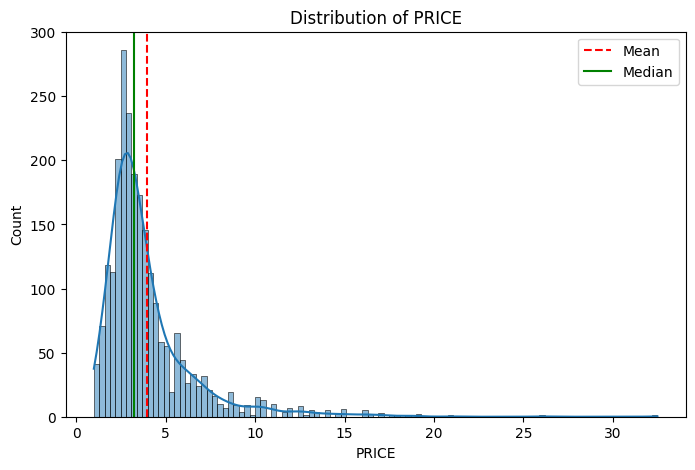

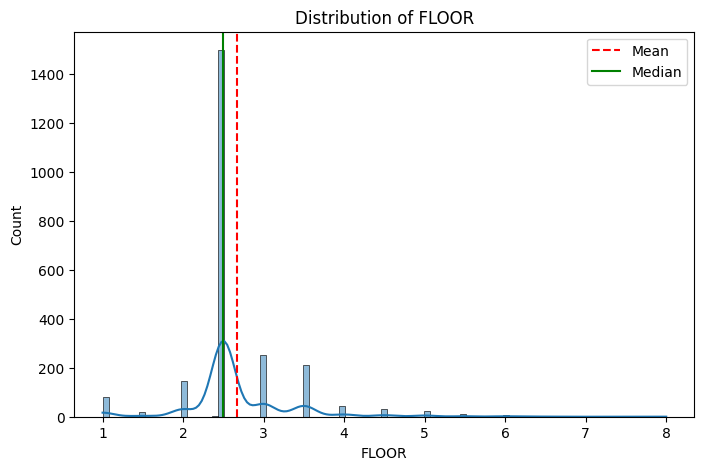

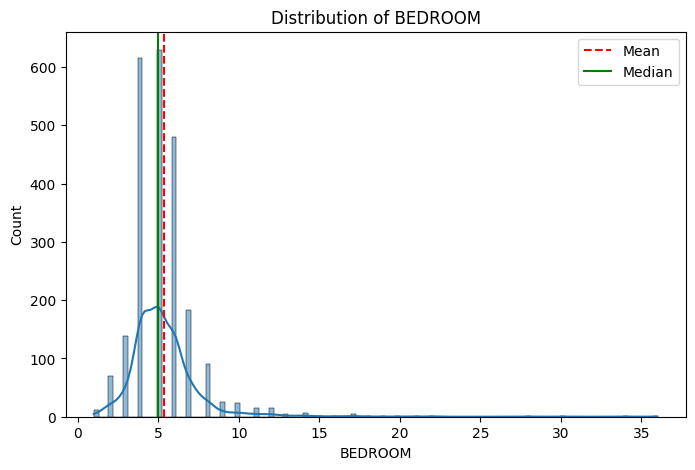

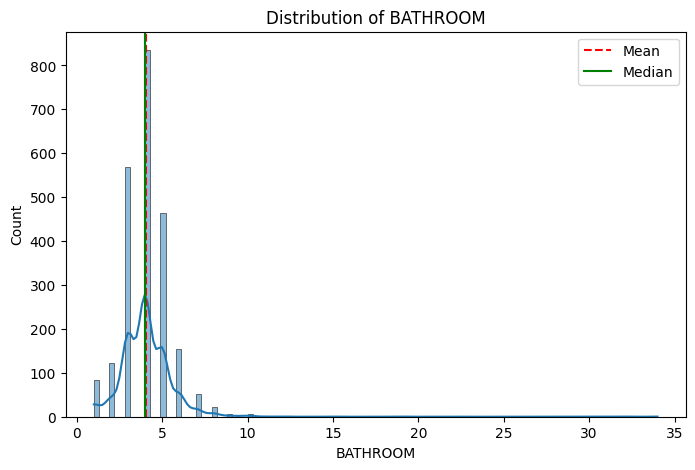

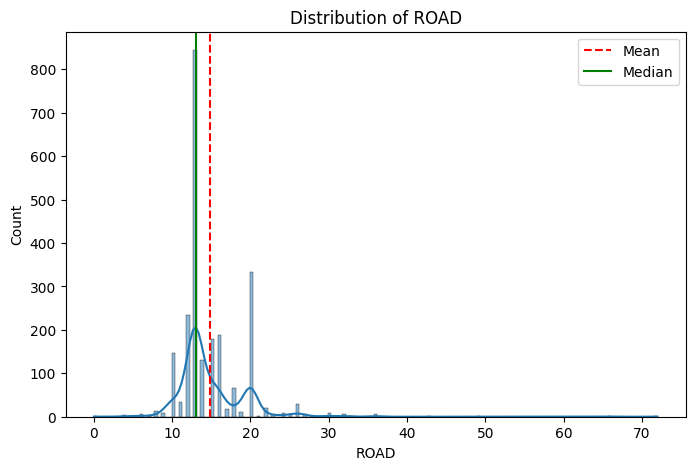

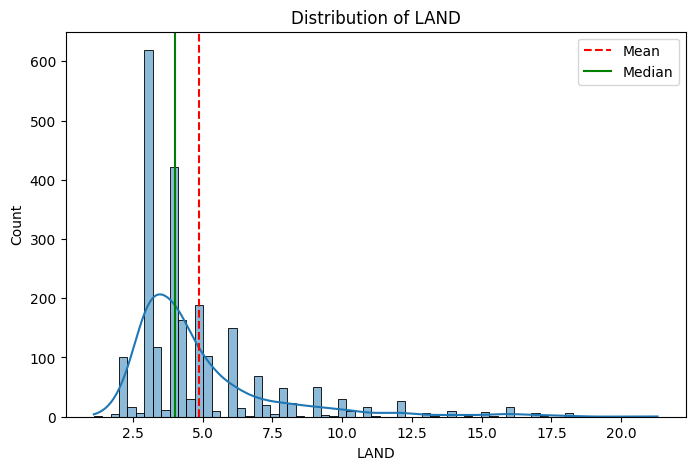

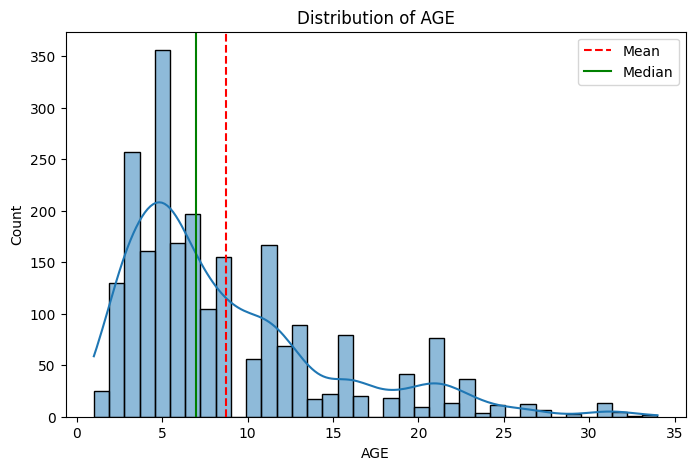

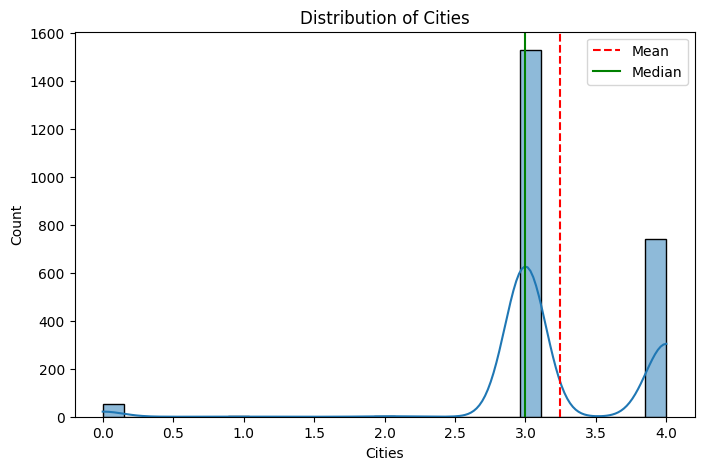

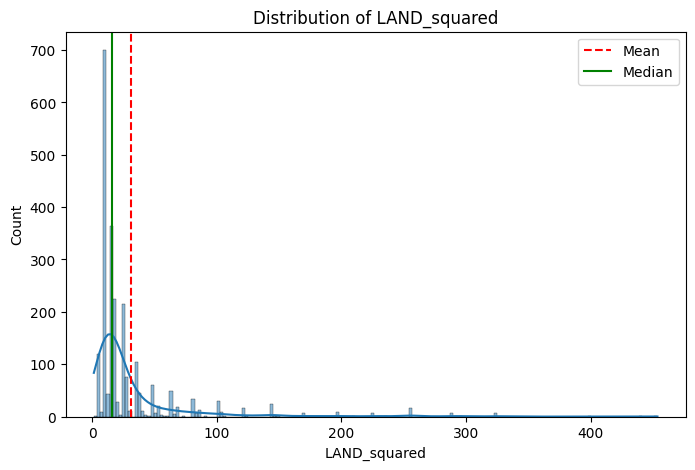

In [35]:
for column in clean_data.columns:
    plot_histogram(clean_data, column)

In [36]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(8, 5))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

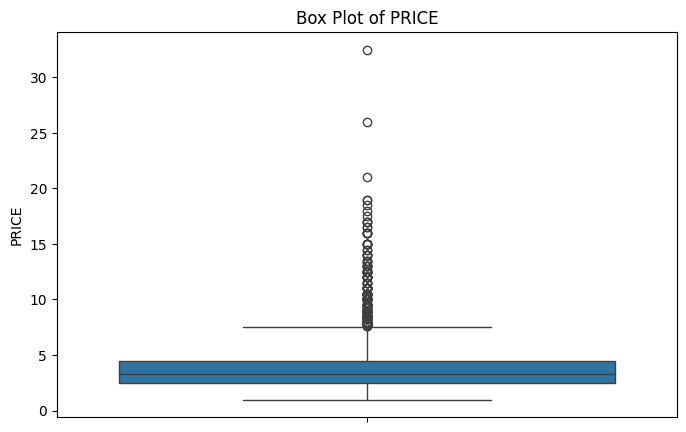

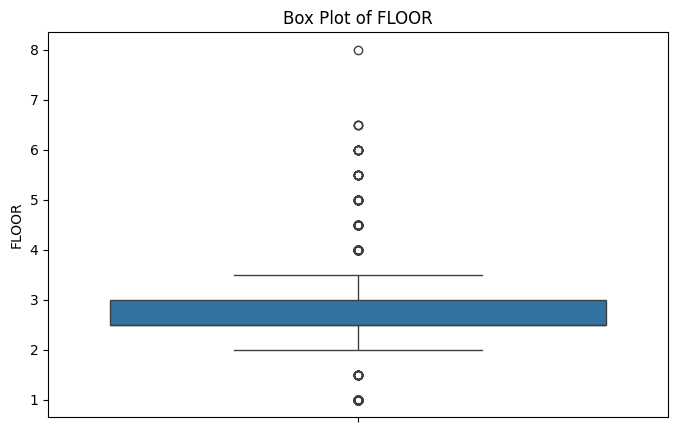

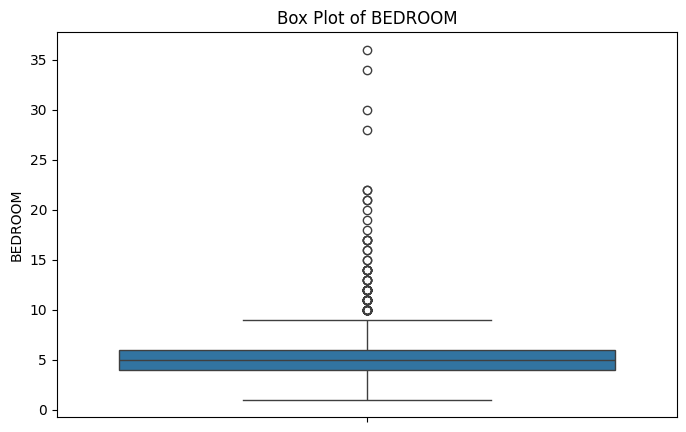

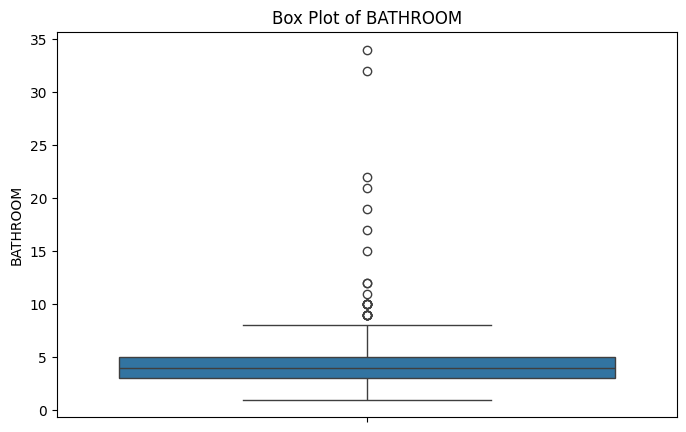

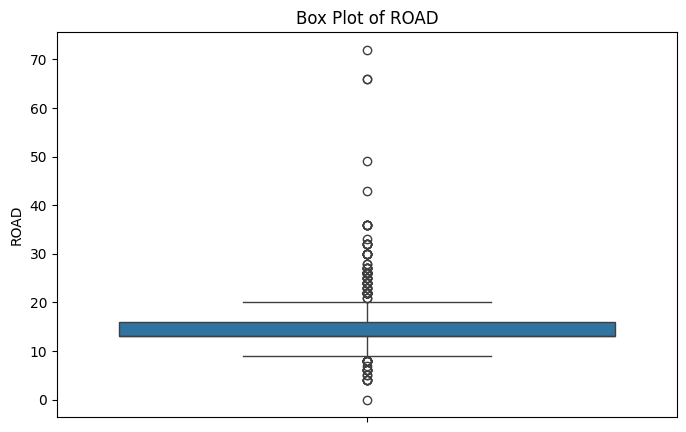

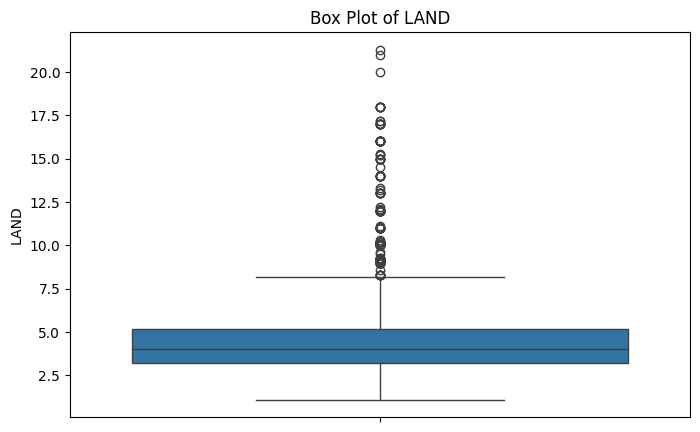

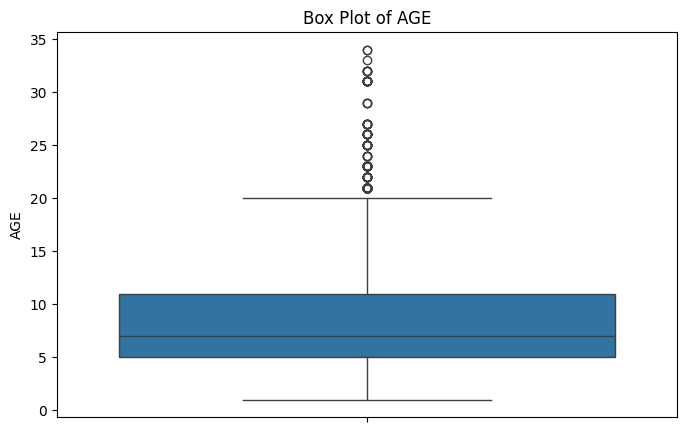

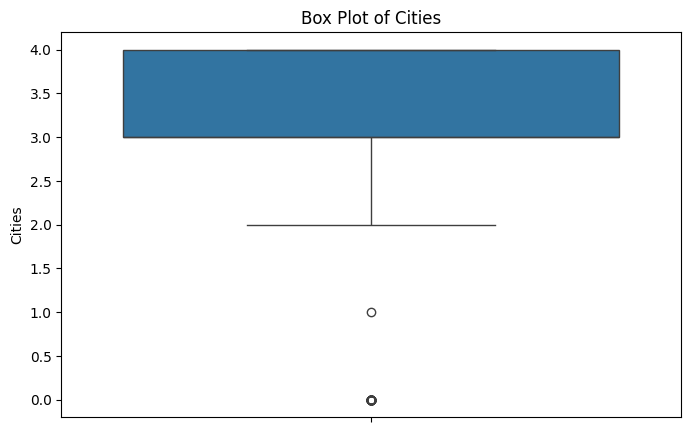

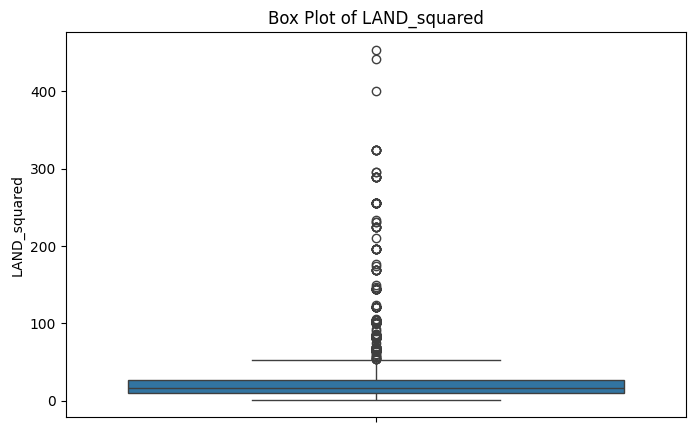

In [37]:
for column in clean_data.columns:
    plot_boxplot(clean_data, column)

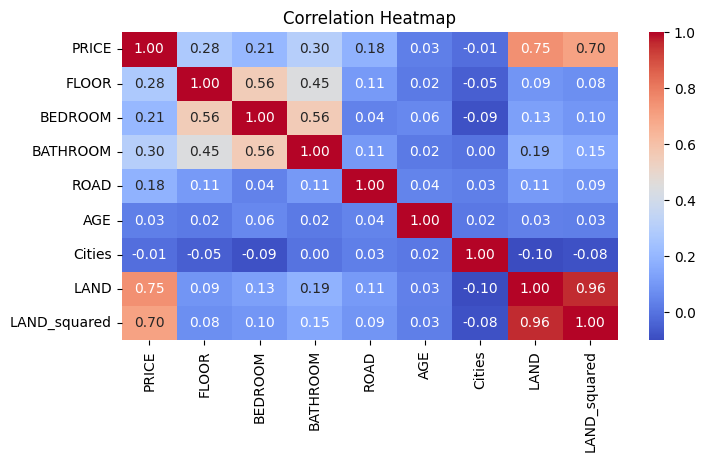

In [38]:
plt.figure(figsize=(8, 4))
sns.heatmap(clean_data[["PRICE","FLOOR","BEDROOM","BATHROOM","ROAD","AGE","Cities","LAND","LAND_squared"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

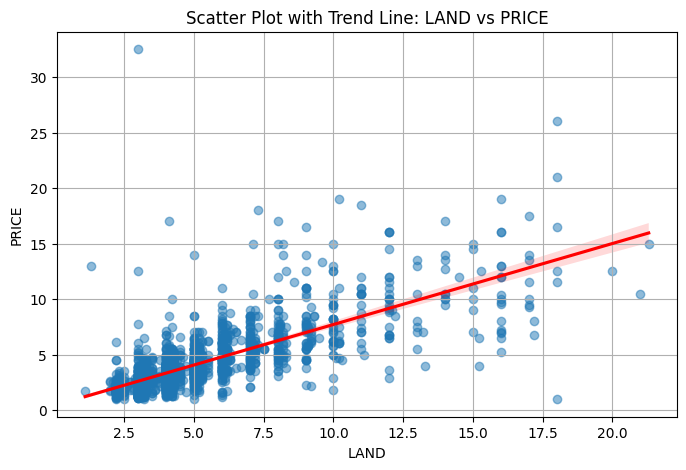

In [39]:
def plot_scatter_with_trend(data, x_col, y_col):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=data[x_col], y=data[y_col], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot with Trend Line: {x_col} vs {y_col}')
    plt.grid(True)
    plt.show()

# Example usage
plot_scatter_with_trend(clean_data, 'LAND', 'PRICE')

In [40]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to include only non-outlier rows
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

clean_data = remove_outliers(clean_data, 'PRICE')

clean_data

,PRICE,FLOOR,BEDROOM,BATHROOM,ROAD,LAND,AGE,Cities,LAND_squared
0,2.90,3.0,5.0,4.0,12,4.0,5,4,16.00
1,4.75,4.5,5.0,6.0,10,3.0,5,4,9.00
2,1.99,2.5,4.0,4.0,10,2.3,21,4,5.29
3,4.00,2.5,4.0,3.0,12,7.0,22,4,49.00
4,1.20,2.0,4.0,4.0,20,6.0,10,3,36.00
...,...,...,...,...,...,...,...,...,...
3413,2.60,2.5,4.0,4.0,16,4.5,5,3,20.25
3414,3.00,3.0,3.0,3.0,16,4.5,5,3,20.25
3415,1.60,2.5,4.0,2.0,16,4.7,9,3,22.09
3416,3.50,2.5,5.0,3.0,16,6.3,4,3,39.69


In [41]:
clean_data['FLOOR'] = clean_data['FLOOR'].astype(int)
clean_data['BEDROOM'] = clean_data['BEDROOM'].astype(int)
clean_data['BATHROOM'] = clean_data['BATHROOM'].astype(int)

Data Scaling


In [42]:
scaler = StandardScaler()

x = clean_data.drop(columns=["PRICE"])
y = clean_data["PRICE"]

Data Splitting,training and evaluation


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=62)
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [44]:
print(y_train.value_counts())

PRICE
2.50    54
3.50    53
4.50    52
2.75    48
3.00    38
        ..
1.43     1
2.67     1
7.40     1
7.15     1
2.11     1
Name: count, Length: 164, dtype: int64


In [45]:
land_greater_than_10 = x_train[x_train['LAND'] > 10]
count = land_greater_than_10.shape[0]
print(f"Number of rows where LAND > 10: {count}")

Number of rows where LAND > 10: 30


Train and Evaluate Linear Regression Model

In [46]:
linear = LinearRegression()
linear.fit(x_train_scale, y_train)
y_pred = linear.predict(x_test_scale)

In [48]:

mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)
score = linear.score(x_test_scale, y_test)

print(f"Mean Absolute Error (MAE): {mae_lr:.3f}")
print(f"Mean Squared Error (MSE): {mse_lr:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.3f}")
print(f"R² Score: {r2_lr:.2f}")
print(f"Score: {score:.2f}")

Mean Absolute Error (MAE): 0.603
Mean Squared Error (MSE): 0.673
Root Mean Squared Error (RMSE): 0.820
R² Score: 0.62
Score: 0.62


Train And Evaluate Random Forest regressor Model


In [49]:
forests = RandomForestRegressor(random_state=42)
forests.fit(x_train, y_train)
y_pred_r = forests.predict(x_test)
mae = mean_absolute_error(y_test, y_pred_r)
mse = mean_squared_error(y_test, y_pred_r)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_r)
score = forests.score(x_test, y_test)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.2f}")

print(f"Score: {score:.2f}")

Mean Absolute Error (MAE): 0.634
Mean Squared Error (MSE): 0.747
Root Mean Squared Error (RMSE): 0.864
R² Score: 0.58
Score: 0.58


Hyperparam tuning Random Forest Regressor model

In [50]:
forest = RandomForestRegressor(random_state=62)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],  # Number of trees
    'max_depth': [20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10,15],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Features to consider for splitting
}

# Use GridSearchCV to search over all combinations in the grid
grid_search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    verbose=2,  # Print progress
    n_jobs=-1,  # Use all available CPU cores
    scoring='neg_mean_squared_error'  # Scoring metric
)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

# Use the best model
best_forest = grid_search.best_estimator_

# Predict on the test set
y_pred_rf = best_forest.predict(x_test)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Hyperparameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 500}


Evaluating Tuned Random Forest Model


In [51]:
mae_r = mean_absolute_error(y_test, y_pred_rf)
mse_r = mean_squared_error(y_test, y_pred_rf)
rmse_r = np.sqrt(mse)
r2_r = r2_score(y_test, y_pred_rf)
score_r = best_forest.score(x_test, y_test)

print(f"Mean Absolute Error (MAE): {mae_r:.3f}")
print(f"Mean Squared Error (MSE): {mse_r:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_r:.3f}")
print(f"R² Score: {r2_r:.2f}")
print(f"Score: {score_r:.2f}")

Mean Absolute Error (MAE): 0.598
Mean Squared Error (MSE): 0.660
Root Mean Squared Error (RMSE): 0.864
R² Score: 0.63
Score: 0.63



Random Forest result before and after hyper parameter tuning

In [53]:
print("EVALUATION OF RANDOM FOREST BEFORE HYPER PARAMETER TUNING")
print("="*60)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

print(f"Score: {score:.2f}")
print("="*60)

print("EVALUATION OF RANDOM FOREST AFTER  HYPER PARAMETER TUNING")
print("="*60)
print(f"Mean Absolute Error (MAE): {mae_r:.2f}")
print(f"Mean Squared Error (MSE): {mse_r:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_r:.2f}")
print(f"R² Score: {r2_r:.2f}")
print(f"Score: {score_r:.2f}")
print("="*60)

EVALUATION OF RANDOM FOREST BEFORE HYPER PARAMETER TUNING
Mean Absolute Error (MAE): 0.63
Mean Squared Error (MSE): 0.75
Root Mean Squared Error (RMSE): 0.86
R² Score: 0.58
Score: 0.58
EVALUATION OF RANDOM FOREST AFTER  HYPER PARAMETER TUNING
Mean Absolute Error (MAE): 0.60
Mean Squared Error (MSE): 0.66
Root Mean Squared Error (RMSE): 0.86
R² Score: 0.63
Score: 0.63


In [54]:
print(x_test_scale.shape)
print(y_test.shape)
print(x_train_scale.shape)
print(y_train.shape)

(646, 8)
(646,)
(1507, 8)
(1507,)


Side by Side evaluation of 2 models

In [56]:
#for linear regression
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)

# For Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)


def print_boxed_results(model_name, mae, mse, rmse, r2):
    print("="*50)
    print(f"{model_name} Performance Metrics".center(50))
    print("="*50)
    print(f"Mean Absolute Error (MAE): {mae:.3f}".rjust(50))
    print(f"Mean Squared Error (MSE): {mse:.3f}".rjust(50))
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}".rjust(50))
    print(f"R² Score: {r2:.2f}".rjust(50))
    print("="*50)

#results for Linear Regression
print_boxed_results("Linear Regression", mae_lr, mse_lr, rmse_lr, r2_lr)

#results for Random Forest
print_boxed_results("Random Forest", mae_rf, mse_rf, rmse_rf, r2_rf)

      Linear Regression Performance Metrics       
                  Mean Absolute Error (MAE): 0.603
                   Mean Squared Error (MSE): 0.673
             Root Mean Squared Error (RMSE): 0.820
                                    R² Score: 0.62
        Random Forest Performance Metrics         
                  Mean Absolute Error (MAE): 0.598
                   Mean Squared Error (MSE): 0.660
             Root Mean Squared Error (RMSE): 0.812
                                    R² Score: 0.63


In [57]:
x

,FLOOR,BEDROOM,BATHROOM,ROAD,LAND,AGE,Cities,LAND_squared
0,3,5,4,12,4.0,5,4,16.00
1,4,5,6,10,3.0,5,4,9.00
2,2,4,4,10,2.3,21,4,5.29
3,2,4,3,12,7.0,22,4,49.00
4,2,4,4,20,6.0,10,3,36.00
...,...,...,...,...,...,...,...,...
3413,2,4,4,16,4.5,5,3,20.25
3414,3,3,3,16,4.5,5,3,20.25
3415,2,4,2,16,4.7,9,3,22.09
3416,2,5,3,16,6.3,4,3,39.69


Prediction Refression


In [58]:
def predict_price(floor, bedroom, bathroom, road, land, age, city):
    # Calculate LAND^2
    land_squared = land ** 2
    
    # Create input data with LAND^2
    input_data = np.array([[floor, bedroom, bathroom, road, land, age, city,land_squared]])
    
    # Scale the input data (if scaling is required)
    input_scaled = scaler.transform(input_data)
    
    # Make the prediction
    predicted_price = linear.predict(input_scaled)
    
    return predicted_price[0]


predicted_price = predict_price(floor=2, bedroom=4, bathroom=3, road=12, land=7, age=22, city=4)
print(f"The predicted price using linear regresson model is: NRs {predicted_price} Cr")

The predicted price using linear regresson model is: NRs 4.825913043966896 Cr


Prediction using Random Forest Regressor Model

In [59]:
def predict_price_rf(floor, bedroom, bathroom, road, land, age, city):
    # Calculate LAND^2
    land_squared = land ** 2
    
    # Create input data with LAND^2
    input_data = np.array([[floor, bedroom, bathroom, road, land, age, city,land_squared]])
    
    # Make the prediction
    predicted_price_rf = best_forest.predict(input_data)
    
    return predicted_price_rf[0]


predicted_price_rf = predict_price_rf(floor=2, bedroom=4, bathroom=3, road=12, land=7, age=22, city=4)
print(f"The predicted price using random forest  regressor model is: NRs {predicted_price_rf} Cr")

The predicted price using random forest  regressor model is: NRs 4.786734095301937 Cr


Result Visualization
Visualization of Random Forest and Linear Regression Model

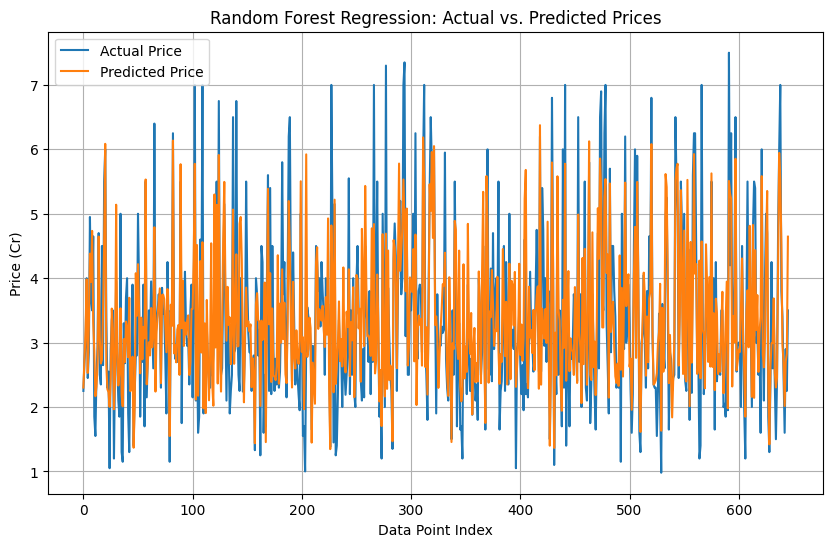

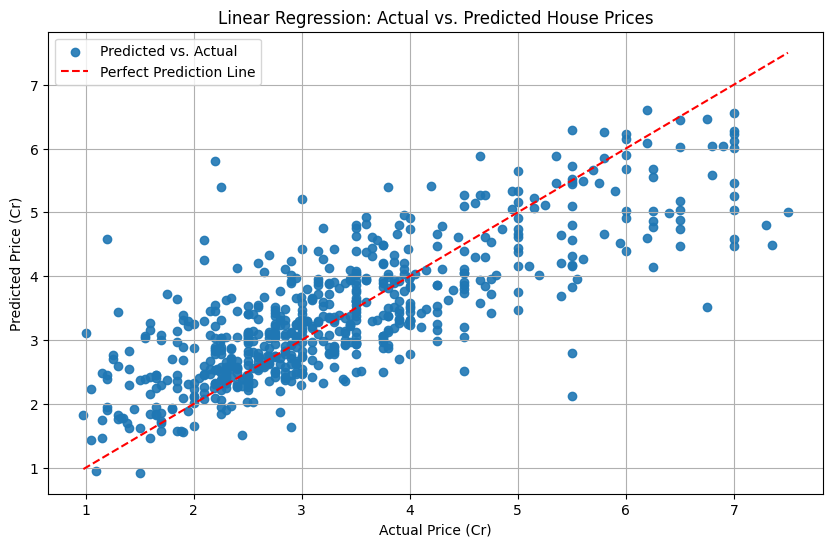

In [60]:
# Visualization of Forest Model
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred_rf, label='Predicted Price')
plt.xlabel('Data Point Index')
plt.ylabel('Price (Cr)')
plt.title('Random Forest Regression: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

# Visualization of Linear Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.9, label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Price (Cr)')
plt.ylabel('Predicted Price (Cr)')
plt.title('Linear Regression: Actual vs. Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

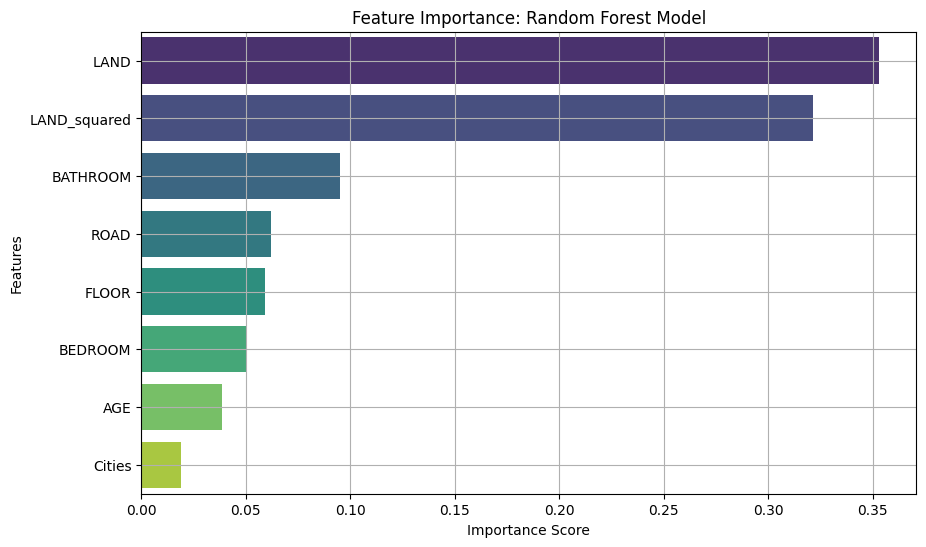

In [61]:
feature_importances = best_forest.feature_importances_
features = x_train.columns


importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance: Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()

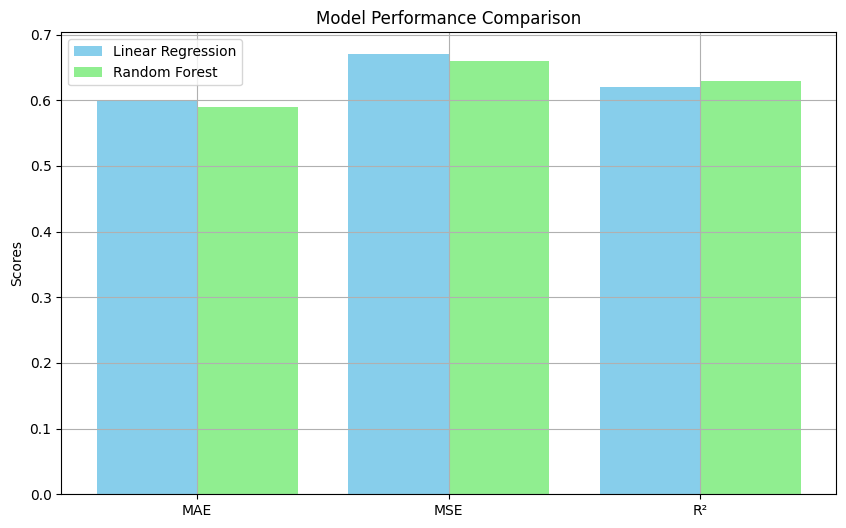

In [62]:
metrics = ['MAE', 'MSE', 'R²']
linear_metrics = [0.60, 0.67, 0.62]  
rf_metrics = [0.59, 0.66, 0.63]     

# Bar Plot
x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar(x, linear_metrics, width=0.4, label='Linear Regression', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], rf_metrics, width=0.4, label='Random Forest', align='center', color='lightgreen')
plt.xticks([i + 0.2 for i in x], metrics)
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

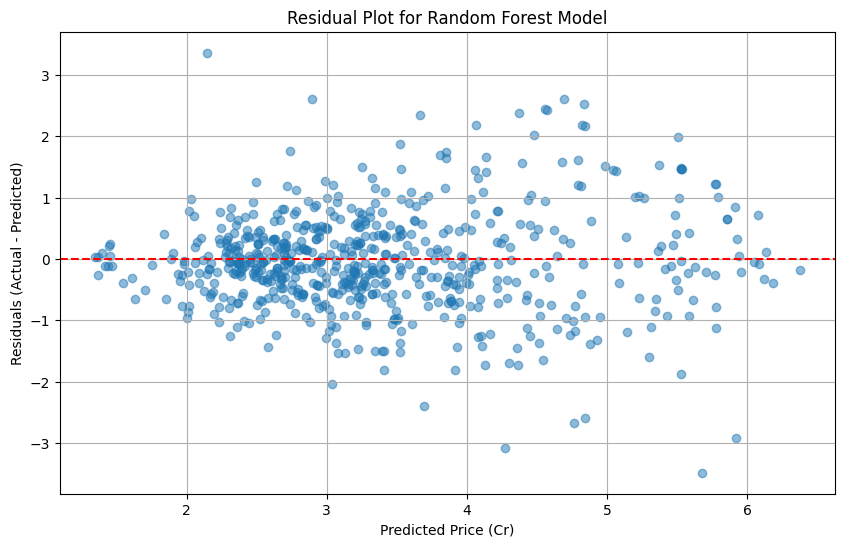

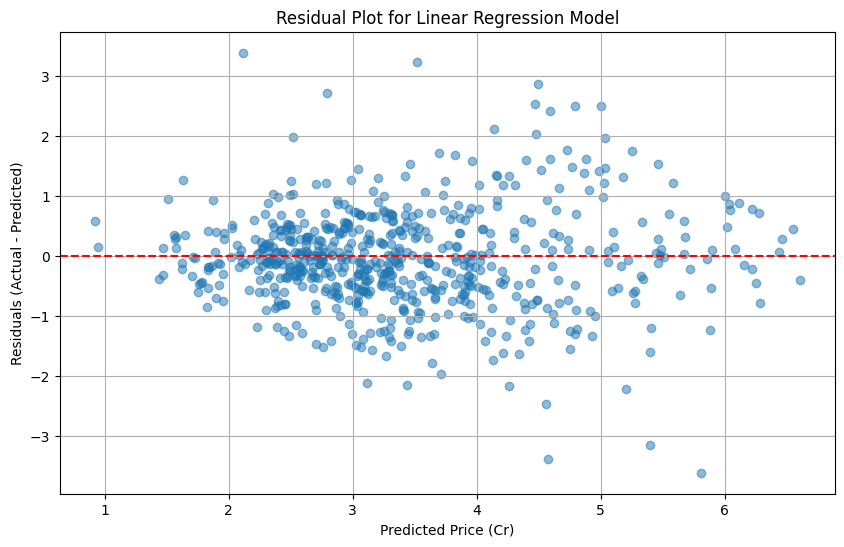

In [63]:
# Residual plot to analyze pattern in erros

# Residual plot for Random Forest
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price (Cr)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Random Forest Model')
plt.grid(True)
plt.show()

# Residual plot for Linear Regression
residuals_lr = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals_lr, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price (Cr)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Linear Regression Model')
plt.grid(True)
plt.show()

Comparing actual and predicted value by Linear Regression

In [64]:
#comparing top 5 actual  value and value predicted by linear regression model
valid_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).dropna()

print(valid_data.tail(5))

      Actual  Predicted
475     2.50   2.326542
2502    1.60   2.423300
696     2.90   2.354140
1105    2.25   3.029059
2198    3.50   4.391328


Comparing actual and predicted value by Random Forest model

In [65]:
#comparing actual  value and value predicted by random forest regressor model
valid_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf

}).dropna()

print(valid_data.tail(5))

      Actual  Predicted
475     2.50   2.697491
2502    1.60   2.016279
696     2.90   2.709668
1105    2.25   2.828039
2198    3.50   4.644670


Save clean data

In [67]:
clean_data.to_csv('clean_data.csv', index=False)

Saving Model for frontend 

In [68]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Save the Linear Regression model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(linear, f)

# Save the Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_forest, f)